In [6]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler



In [17]:
df = pd.read_csv('processed_segments.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,8.743622,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0.0,8.781937,8.796295,8.772354,8.772354,8.772354,8.786728,8.781937,8.801086,8.767563,...,8.777145,8.753204,8.767563,8.762772,8.762772,8.753204,8.748413,8.762772,8.772354,8.767563
2,0.0,8.757996,8.762772,8.777145,8.767563,8.786728,8.777145,8.753204,8.757996,8.777145,...,8.757996,8.757996,8.772354,8.767563,8.757996,8.743622,8.777145,8.743622,8.786728,8.796295
3,0.0,8.757996,8.786728,8.791504,8.781937,8.772354,8.762772,8.781937,8.762772,8.767563,...,8.743622,8.762772,8.767563,8.757996,8.762772,8.781937,8.772354,8.767563,8.767563,8.801086
4,0.0,8.772354,8.762772,8.786728,8.767563,8.753204,8.762772,8.757996,8.757996,8.762772,...,8.777145,8.748413,8.791504,8.748413,8.767563,8.772354,8.772354,8.777145,8.767563,8.781937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5486,1.0,1.781281,7.517792,7.517792,11.506531,18.310852,14.408310,5.880158,9.155426,6.181824,...,-9.974243,-4.079727,12.971787,35.094208,35.094208,29.678528,12.061981,3.869034,0.282516,1.613693
5487,1.0,6.866577,11.966217,13.469772,7.694961,4.419693,15.255859,23.113617,12.947845,12.947845,...,9.155426,15.145721,13.752289,1.455673,6.268021,19.474442,17.611755,17.611755,12.421112,3.189072
5488,1.0,-2.624039,-2.992752,12.392395,14.432251,24.406494,22.993912,10.745178,-1.216248,-4.831497,...,12.014099,10.970230,3.050217,9.270355,9.270355,16.275787,6.411667,6.411667,8.188171,5.961563
5489,1.0,0.009583,9.605545,12.990936,20.561401,15.883133,11.774689,13.302185,10.544067,17.769760,...,60.429657,60.429657,25.072083,9.495407,9.495407,-14.068329,-19.512741,-11.065994,2.049438,10.376465


In [18]:
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()

curb_scene
0.0    5304
1.0     187
Name: count, dtype: int64

In [30]:
#spilt data using sklearn, train data with label now to spilt later
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], test_size=0.2, random_state=111)
train_data

,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
2861,0.0,14.580688,8.781937,-0.292099,2.461243,12.358871,16.079453,9.318237,5.803543,1.489197,...,11.985367,7.694961,10.362106,6.584061,10.630249,10.266342,10.323792,10.070007,5.391739,7.311890
4606,0.0,8.504211,7.331039,13.953415,9.361328,14.777008,5.497086,5.856216,6.076477,7.067688,...,10.558426,6.564896,0.679947,11.334152,13.292603,12.598297,1.134857,-5.061340,4.884170,12.306198
4140,0.0,18.986023,14.341263,5.564117,11.540054,7.034164,6.952759,9.667786,11.942276,9.816223,...,7.651871,9.816223,12.818558,13.187256,8.705322,7.158661,9.682159,12.469009,11.635818,8.355759
776,0.0,6.598419,8.599976,15.897507,10.362106,1.810013,-2.877838,2.221817,14.384369,16.122559,...,8.178589,17.654846,10.668564,11.654968,3.112457,5.252884,7.201752,6.507446,8.489838,6.133942
2316,0.0,8.829819,8.729263,8.633499,8.671799,8.762772,8.753204,8.614334,8.532928,8.595184,...,8.844177,8.695740,8.590393,8.638275,8.858551,8.729263,8.772354,8.719681,8.714890,8.844177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,0.0,5.861008,5.003876,8.892059,11.200073,7.881714,5.123596,5.161896,10.180145,12.152969,...,8.681381,6.148315,9.078812,7.762009,9.940720,10.280701,8.777145,8.796295,8.245636,11.554413
4182,0.0,12.411545,4.199432,3.821152,3.327942,11.961426,10.749970,8.528152,1.010361,9.749191,...,7.010223,6.172256,15.701172,14.772232,9.667786,2.427719,4.979935,11.645401,13.747513,5.578491
4820,0.0,11.650192,13.335709,10.510544,9.342178,7.115570,9.572021,9.888046,6.794739,3.385407,...,9.385269,23.008286,20.968414,9.509766,4.764465,6.229706,20.034683,17.099396,9.260773,-1.604111
2004,0.0,11.219223,8.542511,5.449204,9.236832,12.440277,16.601395,15.073898,16.294937,10.170563,...,8.762772,8.413223,9.093185,3.988739,3.102890,9.485825,13.354858,11.425125,10.189728,5.195419


In [ ]:
#scaling data, becasue neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(train_data.iloc[:, 1:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 1:])
test_data_scaled = scaler.transform(test_data.iloc[:, 1:])
print(train_data_scaled.shape)
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[1:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[1:])
# Add the 'curb_scene' column back to the scaled DataFrames
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
print(train_data_scaled_df.head())

(4392, 100)
    Acc-Z_1   Acc-Z_2   Acc-Z_3   Acc-Z_4   Acc-Z_5   Acc-Z_6   Acc-Z_7  \
0  1.005067 -0.020062 -1.691112 -1.157880  0.575593  1.240395  0.082665   
1 -0.065201 -0.270559  0.950900  0.071775  0.984710 -0.607467 -0.516486   
2  1.780992  0.939757 -0.605002  0.460043 -0.325275 -0.353282  0.143160   
3 -0.400874 -0.051477  1.311457  0.250123 -1.209131 -2.069871 -1.145470   
4 -0.007851 -0.029156 -0.035746 -0.051105 -0.032818 -0.038893 -0.039155   

    Acc-Z_8   Acc-Z_9  Acc-Z_10  ...  Acc-Z_92  Acc-Z_93  Acc-Z_94  Acc-Z_95  \
0 -0.470801 -1.236888  1.006146  ... -0.219926  0.298767 -0.469667  0.297378   
1 -0.427465 -0.293210 -0.358657  ... -0.434960 -1.614621  0.456717  0.790380   
2  0.503892  0.171742  1.576882  ...  0.183716  0.784211  0.818118 -0.059071   
3  0.891641  1.238544 -0.072463  ...  1.675282  0.359329  0.519284 -1.094732   
4 -0.037436 -0.034814 -0.041858  ... -0.029494 -0.051359 -0.069045 -0.030697   

   Acc-Z_96  Acc-Z_97  Acc-Z_98  Acc-Z_99  Acc-Z_100  cu

In [ ]:
# Filter and slice the data
normal_train_data = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].values[:, :-1]
abnormal_train_data = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].values[:, :-1]
normal_test_data = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].values[:, :-1]
abnormal_test_data = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].values[:, :-1]
# Debug: Print the shapes to verify the slicing
print("Normal Train Data Shape:", normal_train_data.shape)
print("Abnormal Train Data Shape:", abnormal_train_data.shape)
print("Normal Test Data Shape:", normal_test_data.shape)
print("Abnormal Test Data Shape:", abnormal_test_data.shape)

Normal Train Data Shape: (4246, 100)
Abnormal Train Data Shape: (146, 100)
Normal Test Data Shape: (1058, 100)
Abnormal Test Data Shape: (41, 100)


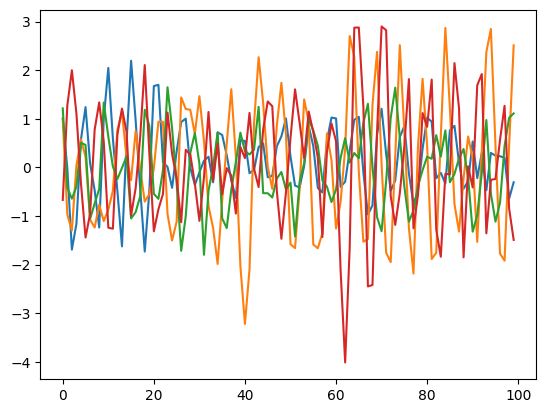

In [ ]:
#See normal data ecg
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[10])
plt.plot(normal_train_data[20])

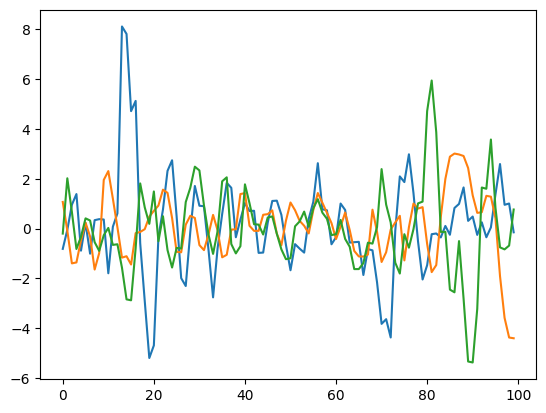

In [62]:
#see abnormal data ecg
plt.plot(abnormal_train_data[20])
plt.plot(abnormal_train_data[30])
plt.plot(abnormal_train_data[100])


In [63]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(8, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(140, activation='sigmoid')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded

In [65]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')
model.compile(optimizer='adam', loss='mae')

In [ ]:
#????
history = model.fit(normal_train_data, normal_train_data,epochs=50, batch_size=128,
                    validation_data=(train_data_scaled[:,:-1], train_data_scaled[:,:-1]), 
                    shuffle=True, callbacks=[early_stopping])